<a href="https://colab.research.google.com/github/JinLeeGG/AI_Project_Preparation/blob/main/3.%20Data%20Analysis/10.%20Seoul%20Bike%20Sharing%20Demand%20Prediction/10_Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://ryuzyproject.tistory.com/72?category=1106451

# 1. 서울 자전거 공유 수요 데이터셋
[서울시의 공공자전거](https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing/data) 대여 서비스인 ‘따릉이’의 대여 수요를 예측하는 문제에 사용되는 데이터셋입니다. 특정 시간대와 날씨, 요일, 공휴일 여부, 기온, 습도 등 다양한 데이터를 활용하여 자전거 대여 수요를 예측합니다.

# 2. 데이터셋 컬럼
- Date : 연월일
- Rented Bike count - 매 시간마다 대여한 자전거 수
- Hour - 하루 중 시간
- Temperature - 온도
- Humidity - 습도 %
- Windspeed - 풍속 m/s
- Visibility - 가시거리 m
- Dew point temperature - 이슬점 온도
- Solar radiation - 태양 복사 MJ/m2
- Rainfall - 강우량 mm
- Snowfall - 적설량 cm
- Seasons - 겨울, 봄, 여름, 가을
- Holiday - 휴일/휴일 없음
- Functioning Day - 운영되지 않았던 날, 정상적으로 운영된 날

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
'''
※ CP949

Microsoft Windows의 한국어 문자 인코딩입니다.
EUC-KR을 확장한 형태로, 더 많은 한국어 문자(한자, 확장 문자 등)를 지원합니다.
주로 Windows 환경에서 저장된 한글 파일에서 사용됩니다.
'''

bike_df = pd.read_csv("/content/drive/MyDrive/Python_Computer Vision With AI/3. Data Analysis/data/SeoulBikeData.csv",  encoding='CP949')
bike_df

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [6]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
bike_df.columns = ['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature',
       'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning Day']

In [9]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


<Axes: xlabel='Temperature', ylabel='Rented Bike Count'>

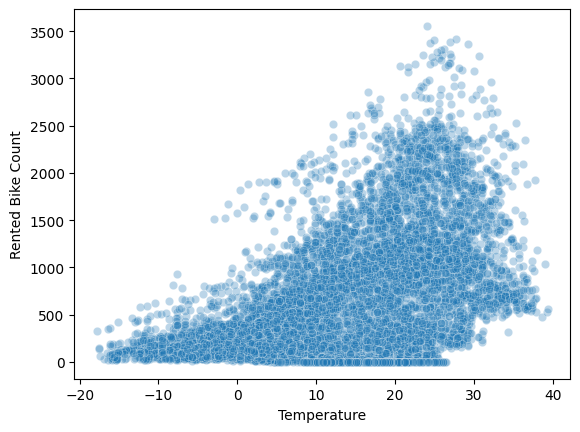

In [10]:
# 온도 변화에 따라서 자전거 대여수가 확실히 차이가 있다.
sns.scatterplot(x='Temperature', y = 'Rented Bike Count', data=bike_df, alpha=0.3) # scatterplot 만들기, 온도

<Axes: xlabel='Wind speed', ylabel='Rented Bike Count'>

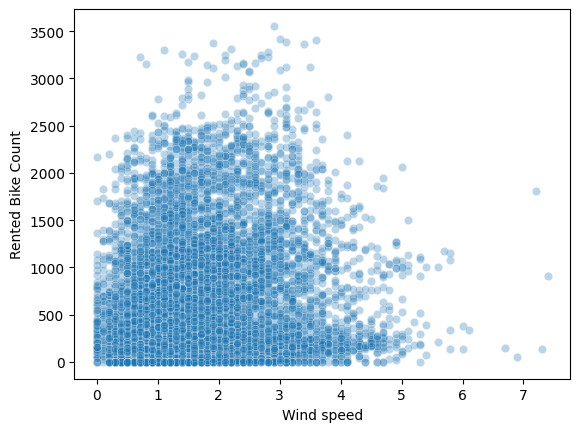

In [11]:
sns.scatterplot(x='Wind speed', y='Rented Bike Count', data=bike_df, alpha=0.3) # 풍속

<Axes: xlabel='Visibility', ylabel='Rented Bike Count'>

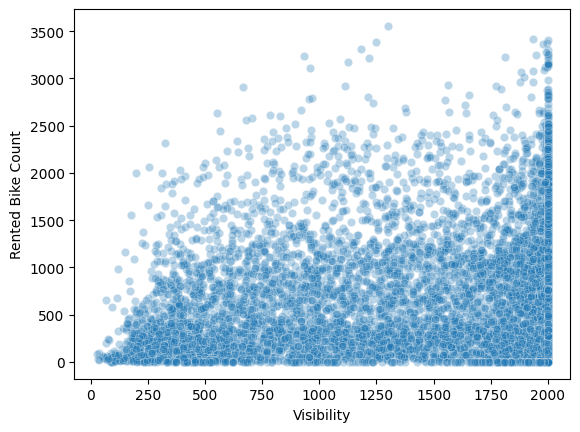

In [12]:
sns.scatterplot(x='Visibility', y='Rented Bike Count', data=bike_df, alpha=0.3) # 가시성

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

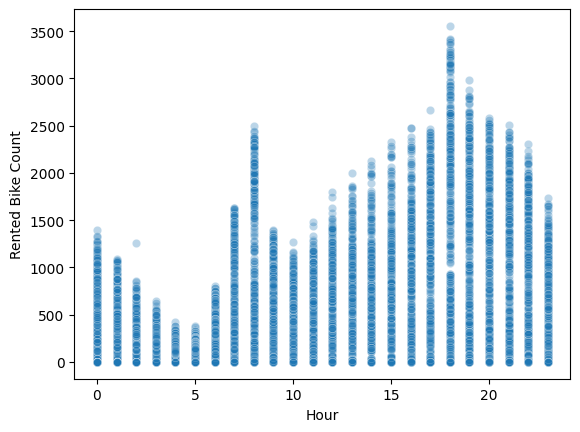

In [13]:
sns.scatterplot(x='Hour', y='Rented Bike Count', data=bike_df, alpha=0.3) # 시간

In [14]:
bike_df.isna().sum() # 빈 데이터는 없다.

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature,0
Humidity,0
Wind speed,0
Visibility,0
Dew point temperature,0
Solar Radiation,0
Rainfall,0


In [15]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

In [17]:
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y') # pd.to_datetime, format으로 날짜 설정

In [18]:
bike_df['Date']

,Date
0,2017-12-01
1,2017-12-01
2,2017-12-01
3,2017-12-01
4,2017-12-01
...,...
8755,2018-11-30
8756,2018-11-30
8757,2018-11-30
8758,2018-11-30


In [19]:
bike_df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [22]:
# 년도, 월, 일을 뽑아 파생변수를 만든다.
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


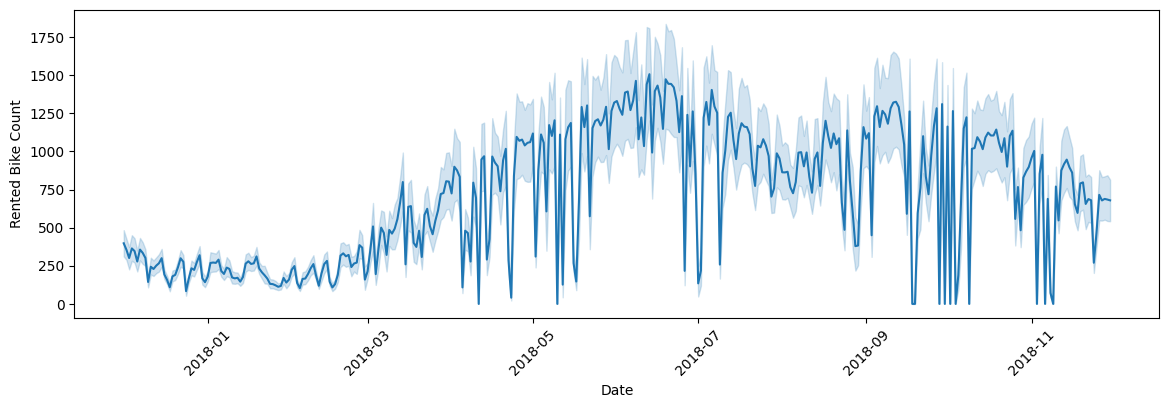

In [23]:
# 날짜별로 빌린 개수 그래프로 만들기
plt.figure(figsize=(14, 4))
sns.lineplot(x='Date', y='Rented Bike Count', data=bike_df)
plt.xticks(rotation=45)
plt.show()

In [26]:
bike_df[bike_df['year'] == 2017].groupby('month')['Rented Bike Count'].mean() # 17년도 달별 평균

,Rented Bike Count
month,
12,249.099462


In [27]:
bike_df[bike_df['year'] == 2018].groupby('month')['Rented Bike Count'].mean() # 18년도 달별 평균

,Rented Bike Count
month,
1,201.620968
2,225.941964
3,511.551075
4,728.093056
5,950.387097
6,1245.676389
7,987.177419
8,876.192204
9,935.572222


### ※ pd.cut()

pd.cut()은 숫자 데이터를 구간(bins)으로 나누어 범주형 데이터로 변환하는 데 사용됩니다. 주로 연속형 데이터를 특정 범주로 분류할 때 활용됩니다.

bins: 숫자 데이터를 나눌 경계값(구간)입니다.

- 0 ≤ Hour ≤ 5	| Dawn (새벽)
- 5 < Hour ≤ 11	| Morning (아침)
- 11 < Hour ≤ 17	| Afternoon (오후)
- 17 < Hour ≤ 23	| Evening (저녁)

주의: bins의 경계값은 오른쪽 경계값(])을 포함합니다.

In [31]:
# 파생변수 만들기
bike_df['TimeOfDay'] = pd.cut(bike_df['Hour'],
                            bins=[0, 5, 11, 17, 23],
                            labels=['Dawn', 'Morning', 'Afternoon', 'Evening'],
                            include_lowest=True) # 0을 포함

In [33]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn


<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

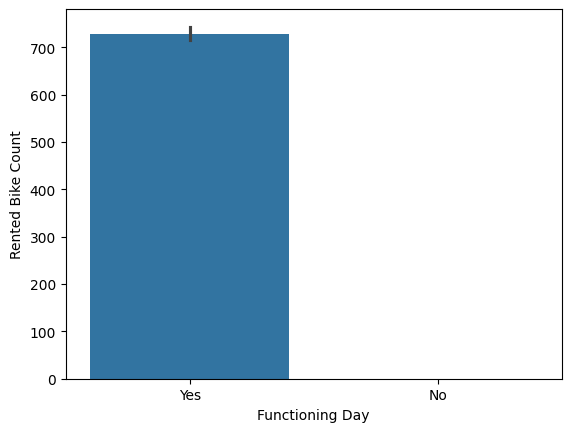

In [34]:
sns.barplot(x='Functioning Day', y='Rented Bike Count', data=bike_df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

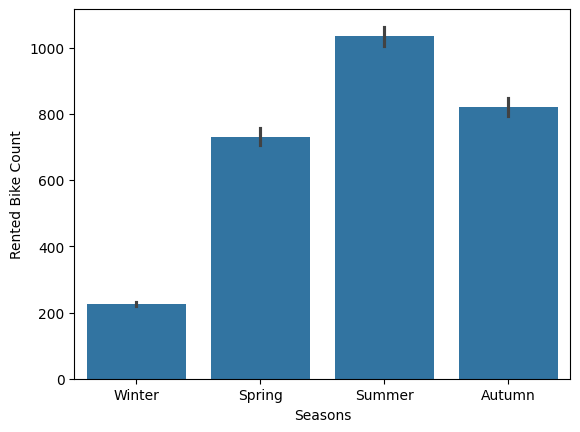

In [35]:
sns.barplot(x='Seasons', y='Rented Bike Count', data=bike_df)

### ※ barplot의 bar의 역할

- 신뢰구간(CI): 평균값이 속할 것으로 예상되는 값의 범위입니다.
- 바 그래프에서 신뢰구간: 검은색 심지(Error Bar)로 나타납니다.
- 신뢰구간이 좁다: 평균값에 대한 확신이 높다.
- 신뢰구간이 넓다: 평균값에 대한 확신이 낮고 데이터가 흩어져 있다.

In [37]:
bike_df['Functioning Day'].value_counts()

,count
Functioning Day,
Yes,8465
No,295


In [38]:
bike_df['Seasons'].value_counts()

,count
Seasons,
Spring,2208
Summer,2208
Autumn,2184
Winter,2160


In [41]:
bike_df[bike_df['Functioning Day'] == 'Yes']

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening


In [42]:
bike_df[bike_df['Functioning Day'] == 'No']

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening


In [43]:
# date 삭제
bike_df = bike_df.drop('Date', axis=1)
bike_df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn


In [44]:
# 문자를 --> 숫자로 바꾸기
bike_df.select_dtypes(exclude=['number']).columns.tolist()

['Seasons', 'Holiday', 'Functioning Day', 'TimeOfDay']

In [45]:
# one-hot-encoding을 해주기 위해서 확인

for i in bike_df.select_dtypes(exclude=['number']).columns.tolist():
    print(i, bike_df[i].nunique())

Seasons 4
Holiday 2
Functioning Day 2
TimeOfDay 4


In [46]:
# one-hot-encoding

bike_df = pd.get_dummies(bike_df, columns=bike_df.select_dtypes(exclude=['number']).columns.tolist(), drop_first=True) #drop first : one-hot-encoding 하는 것의 맨 앞 컬럼을 삭제한다.
bike_df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,...,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,TimeOfDay_Morning,TimeOfDay_Afternoon,TimeOfDay_Evening
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False


In [47]:
# 모든 컬럼 간 상관관계 분석
correlation_matrix = bike_df.corr()
correlation_matrix

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,...,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,TimeOfDay_Morning,TimeOfDay_Afternoon,TimeOfDay_Evening
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,...,1.335139e-01,2.229091e-02,2.288822e-02,2.965494e-01,-4.249251e-01,7.233757e-02,0.203943,-8.111499e-02,1.286388e-01,3.229776e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,...,1.749134e-15,1.450952e-16,-1.159917e-15,8.578102e-16,-1.697335e-15,1.289087e-16,0.005439,-2.502173e-01,2.502173e-01,7.506519e-01
Temperature,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,...,2.161826e-01,1.564544e-02,7.959684e-03,6.658462e-01,-7.387196e-01,5.593084e-02,-0.050170,-7.558973e-02,1.726003e-01,1.906132e-02
Humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,...,1.398748e-01,-2.904392e-02,1.569416e-02,1.925949e-01,-2.382952e-01,5.027765e-02,-0.020800,1.056593e-01,-3.656480e-01,-2.142835e-03
Wind speed,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,...,-1.567102e-01,-3.197744e-02,8.385451e-02,-6.469790e-02,1.091865e-01,-2.301677e-02,0.005037,-1.577725e-01,3.541009e-01,6.704981e-02
Visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,...,6.487420e-02,-1.017585e-01,-1.874983e-01,6.195792e-02,8.616224e-03,-3.177281e-02,-0.026000,-8.746190e-02,7.851103e-02,6.566160e-02
Dew point temperature,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,...,2.425519e-01,1.525311e-04,2.055888e-03,6.523778e-01,-7.223664e-01,6.675910e-02,-0.052837,-1.565173e-02,-2.247482e-02,2.327422e-02
Solar Radiation,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,...,-3.159544e-02,-2.981839e-03,7.997416e-02,1.284017e-01,-1.784202e-01,5.077255e-03,-0.007665,6.904654e-02,6.278890e-01,-3.186951e-01
Rainfall,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,...,1.195810e-02,-1.623338e-03,1.759519e-02,5.392817e-02,-5.875456e-02,1.426911e-02,0.002055,1.310406e-02,-8.558828e-03,1.294048e-02
Snowfall,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,...,5.312091e-02,1.020774e-01,-9.978516e-02,-9.978516e-02,2.258745e-01,1.259072e-02,0.032089,3.772862e-02,-1.364267e-02,-2.251644e-02


### corr() 함수
> 데이터프레임의 숫자형 열 간의 상관관계를 계산하는 데 사용됩니다. 상관관계는 두 변수 간의 선형 관계를 나타내며, 주로 -1에서 1 사이의 값으로 표현됩니다.

> Pearson 상관계수를 기본으로 사용합니다.
숫자형 열만 상관관계 분석에 포함됩니다.
높은 상관관계(>|0.5|): 강한 관계
낮은 상관관계(<|0.2|): 약한 관계
corr()를 사용하여 높은 상관관계를 가진 컬럼을 식별하고 제거할지 여부를 판단할 수 있습니다. 특히, 다중공선성(multicollinearity) 문제가 발생할 경우 머신러닝 모델의 성능이 저하될 수 있으므로, 상관관계가 높은 컬럼을 적절히 제거하는 것이 중요합니다.

### ※ 다중공선성

> 다중공선성(Multicollinearity)은 회귀 분석에서 독립 변수들(설명 변수) 간에 강한 상관관계가 존재하는 현상을 의미합니다. 이러한 상관관계가 높으면 각 독립 변수가 종속 변수에 미치는 개별적인 영향을 정확하게 추정하기 어려워지며, 회귀 계수의 추정치가 불안정해져 작은 데이터 변화에도 크게 변할 수 있습니다. 이는 모델의 예측 성능 저하와 해석의 신뢰성 감소로 이어질 수 있으므로, 다중공선성이 높은 변수를 식별하고 제거하거나 조정하는 것이 중요합니다.

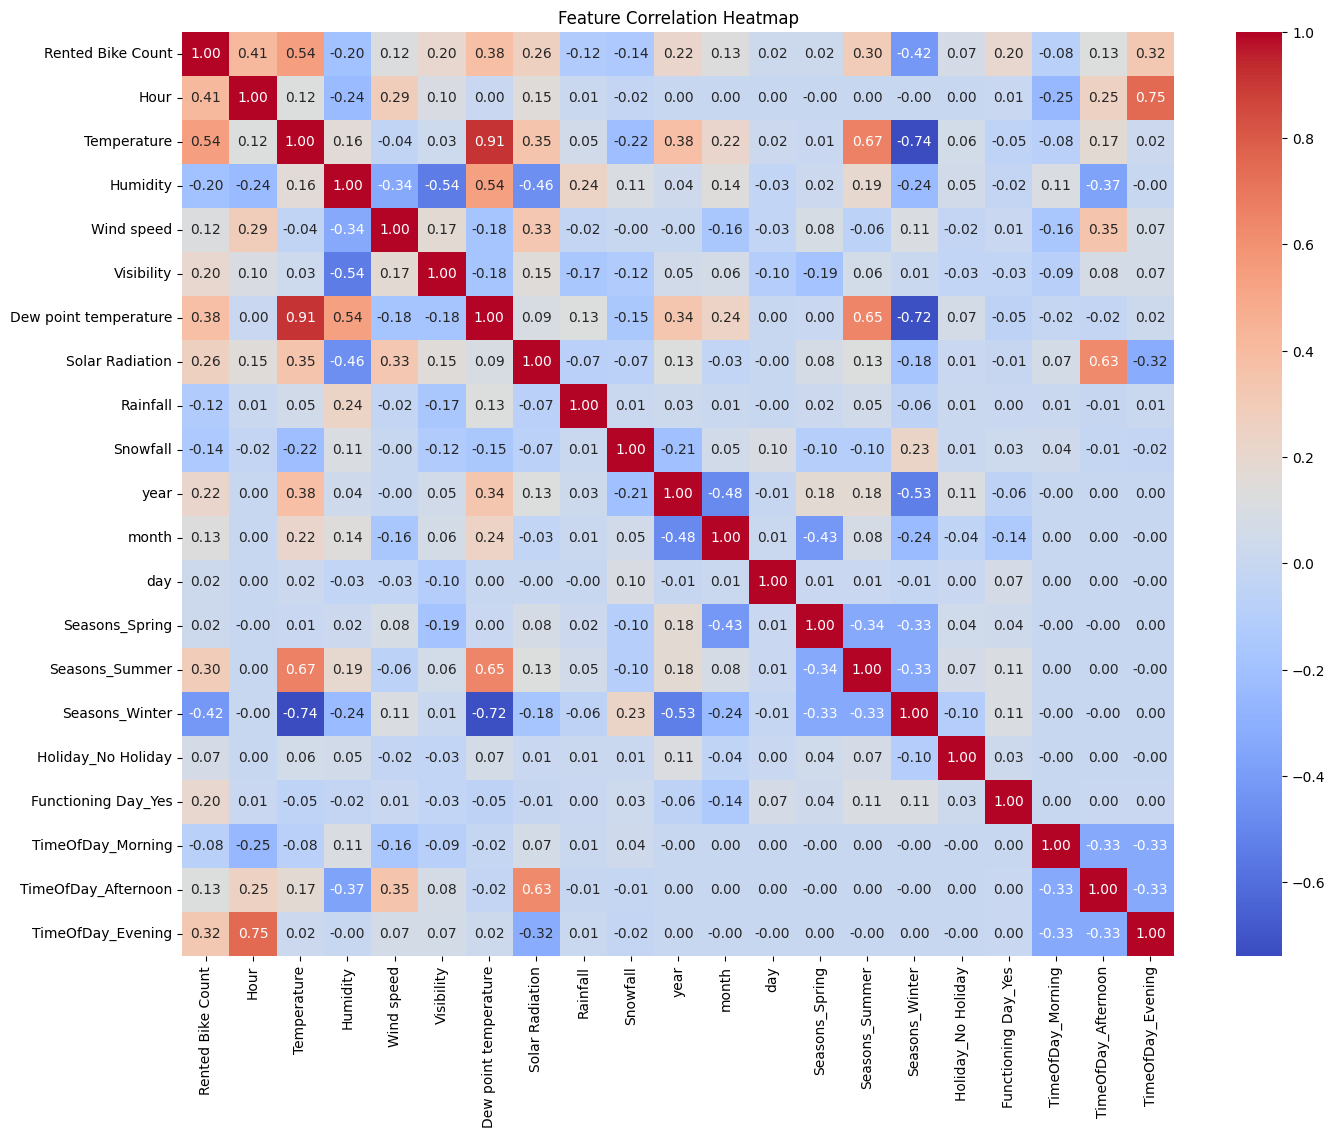

In [48]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [49]:
bike_df = bike_df.drop(['Dew point temperature'], axis=1)
bike_df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,year,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,TimeOfDay_Morning,TimeOfDay_Afternoon,TimeOfDay_Evening
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False


In [50]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Humidity             8760 non-null   int64  
 4   Wind speed           8760 non-null   float64
 5   Visibility           8760 non-null   int64  
 6   Solar Radiation      8760 non-null   float64
 7   Rainfall             8760 non-null   float64
 8   Snowfall             8760 non-null   float64
 9   year                 8760 non-null   int32  
 10  month                8760 non-null   int32  
 11  day                  8760 non-null   int32  
 12  Seasons_Spring       8760 non-null   bool   
 13  Seasons_Summer       8760 non-null   bool   
 14  Seasons_Winter       8760 non-null   bool   
 15  Holiday_No Holiday   8760 non-null   b

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bike_df.drop('Rented Bike Count', axis=1), bike_df['Rented Bike Count'], test_size=0.3, random_state=2025)


In [52]:
X_train.shape, y_train.shape

((6132, 19), (6132,))

In [53]:
X_test.shape, y_test.shape

((2628, 19), (2628,))

# 4. 결정 트리
결정 트리(Decision Tree)는 데이터를 기반으로 의사결정을 수행하는 트리 구조의 예측 모델입니다. 루트 노드(root node)에서 시작해 각 노드는 특정 특성(feature)의 조건에 따라 가지(branch)로 분기되며, 최종적으로 리프 노드(leaf node)에 도달해 예측 결과(클래스나 값)를 도출합니다. 주로 분류(Classification)와 회귀(Regression) 문제에 사용되며, 데이터의 패턴을 직관적으로 시각화할 수 있어 해석이 용이합니다. 하지만 트리가 너무 깊어지면 과적합(overfitting) 문제가 발생할 수 있으므로 가지치기(pruning)나 최대 깊이 설정 등으로 제어해야 합니다.